In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# ==========================================
# 1. Load Data
# ==========================================
FOLDER_PATH = '../preprocess/'
try:
    df_g1 = pd.read_pickle(f'{FOLDER_PATH}df_g1_processed.pkl')
    df_g2 = pd.read_pickle(f'{FOLDER_PATH}df_g2_processed.pkl')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: Pickle files not found. Please check FOLDER_PATH.")

Data loaded successfully.


In [4]:
# ==========================================
# 2. Visualization Function (Base)
# ==========================================
def plot_asset_group_analysis(df, group_name, quarter_id=None):
    """
    Plots Correlation, Time Series, and Distributions.
    Looks for columns ending with 'rtn' and 'vol'.
    """
    # Identify columns
    ret_cols = [c for c in df.columns if c.endswith('rtn')]
    vol_cols = [c for c in df.columns if c.endswith('vol')]

    if not ret_cols:
        print(f"Warning: No columns ending with 'rtn' found in {group_name}.")
        return

    # Create a clean copy dropping NaNs
    plot_df = df.dropna(subset=ret_cols + vol_cols).copy()

    if plot_df.empty:
        print(f"Warning: No valid data for {group_name} in {quarter_id}")
        return

    # Create Figure
    fig = plt.figure(figsize=(20, 12))

    title_text = f"Analysis for {group_name}"
    if quarter_id:
        title_text += f" [{quarter_id}]"

    plt.suptitle(title_text, fontsize=20, y=0.95)

    # --- 1. Correlation Matrix (Returns) ---
    ax1 = plt.subplot(2, 3, 3)
    corr_matrix = plot_df[ret_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax1, fmt=".2f")
    ax1.set_title('Correlation Matrix (Returns)')

    # --- 2. Time Series: Cumulative Returns (Zoomed In) ---
    ax2 = plt.subplot(2, 3, 1)

    # Calculate all cumulative returns first to determine Y-axis limits
    # Normalizing start to 1.0 for this specific period
    all_cum_rets = (1 + plot_df[ret_cols]).cumprod()

    for col in ret_cols:
        cum_ret = all_cum_rets[col]
        label_name = col.replace('_rtn', '').replace('rtn', '')
        ax2.plot(plot_df.index, cum_ret, label=label_name, linewidth=1)

    ax2.set_title('Time Series: Cumulative Returns (Zoomed)')
    ax2.set_ylabel('Growth (Base=1.0)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Zoom-in logic
    y_min_limit = all_cum_rets.quantile(0.01).min()
    y_max_limit = all_cum_rets.quantile(0.99).max()
    y_range = y_max_limit - y_min_limit

    # Handle edge case where range is 0 (flat data)
    if y_range == 0:
        y_range = 0.01

    ax2.set_ylim(y_min_limit - (y_range * 0.05), y_max_limit + (y_range * 0.05))

    # --- 3. Time Series: Volatility ---
    ax3 = plt.subplot(2, 3, 2)
    for col in vol_cols:
        label_name = col.replace('_vol', '').replace('vol', '')
        ax3.plot(plot_df.index, plot_df[col], label=label_name, linewidth=1, alpha=0.8)

    ax3.set_title('Time Series: Annualized Volatility')
    ax3.set_ylabel('Volatility (Ann.)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # --- 4. Histogram: Returns ---
    ax4 = plt.subplot(2, 3, 4)
    for col in ret_cols:
        label_name = col.replace('_rtn', '').replace('rtn', '')
        sns.histplot(plot_df[col], kde=True, label=label_name,
                     element="step", stat="density", alpha=0.3, ax=ax4)

    ax4.set_title('Distribution: Log Returns')
    # Limit outliers
    q_low = plot_df[ret_cols].quantile(0.005).min()
    q_high = plot_df[ret_cols].quantile(0.995).max()
    ax4.set_xlim(q_low, q_high)
    ax4.legend()

    # --- 5. Histogram: Volatility (Zoomed In) ---
    ax5 = plt.subplot(2, 3, 5)
    for col in vol_cols:
        label_name = col.replace('_vol', '').replace('vol', '')
        try:
            sns.kdeplot(plot_df[col], label=label_name, fill=True, alpha=0.2, ax=ax5)
        except:
            pass # Skip KDE if data is insufficient (e.g. constant vol)

    ax5.set_title('Distribution: Volatility (Density)')

    # Zoom logic
    vol_max_limit = plot_df[vol_cols].quantile(0.99).max()
    if pd.notna(vol_max_limit) and vol_max_limit > 0:
        ax5.set_xlim(0, vol_max_limit)

    ax5.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


 STARTING ANALYSIS: GROUP 1 (Indices)
Found 7 quarters for Group 1 (Indices): ['2023_Q1', '2023_Q3', '2023_Q4', '2024_Q2', '2024_Q4', '2025_Q1', '2025_Q2']

Processing Group 1 (Indices) - Quarter: 2023_Q1


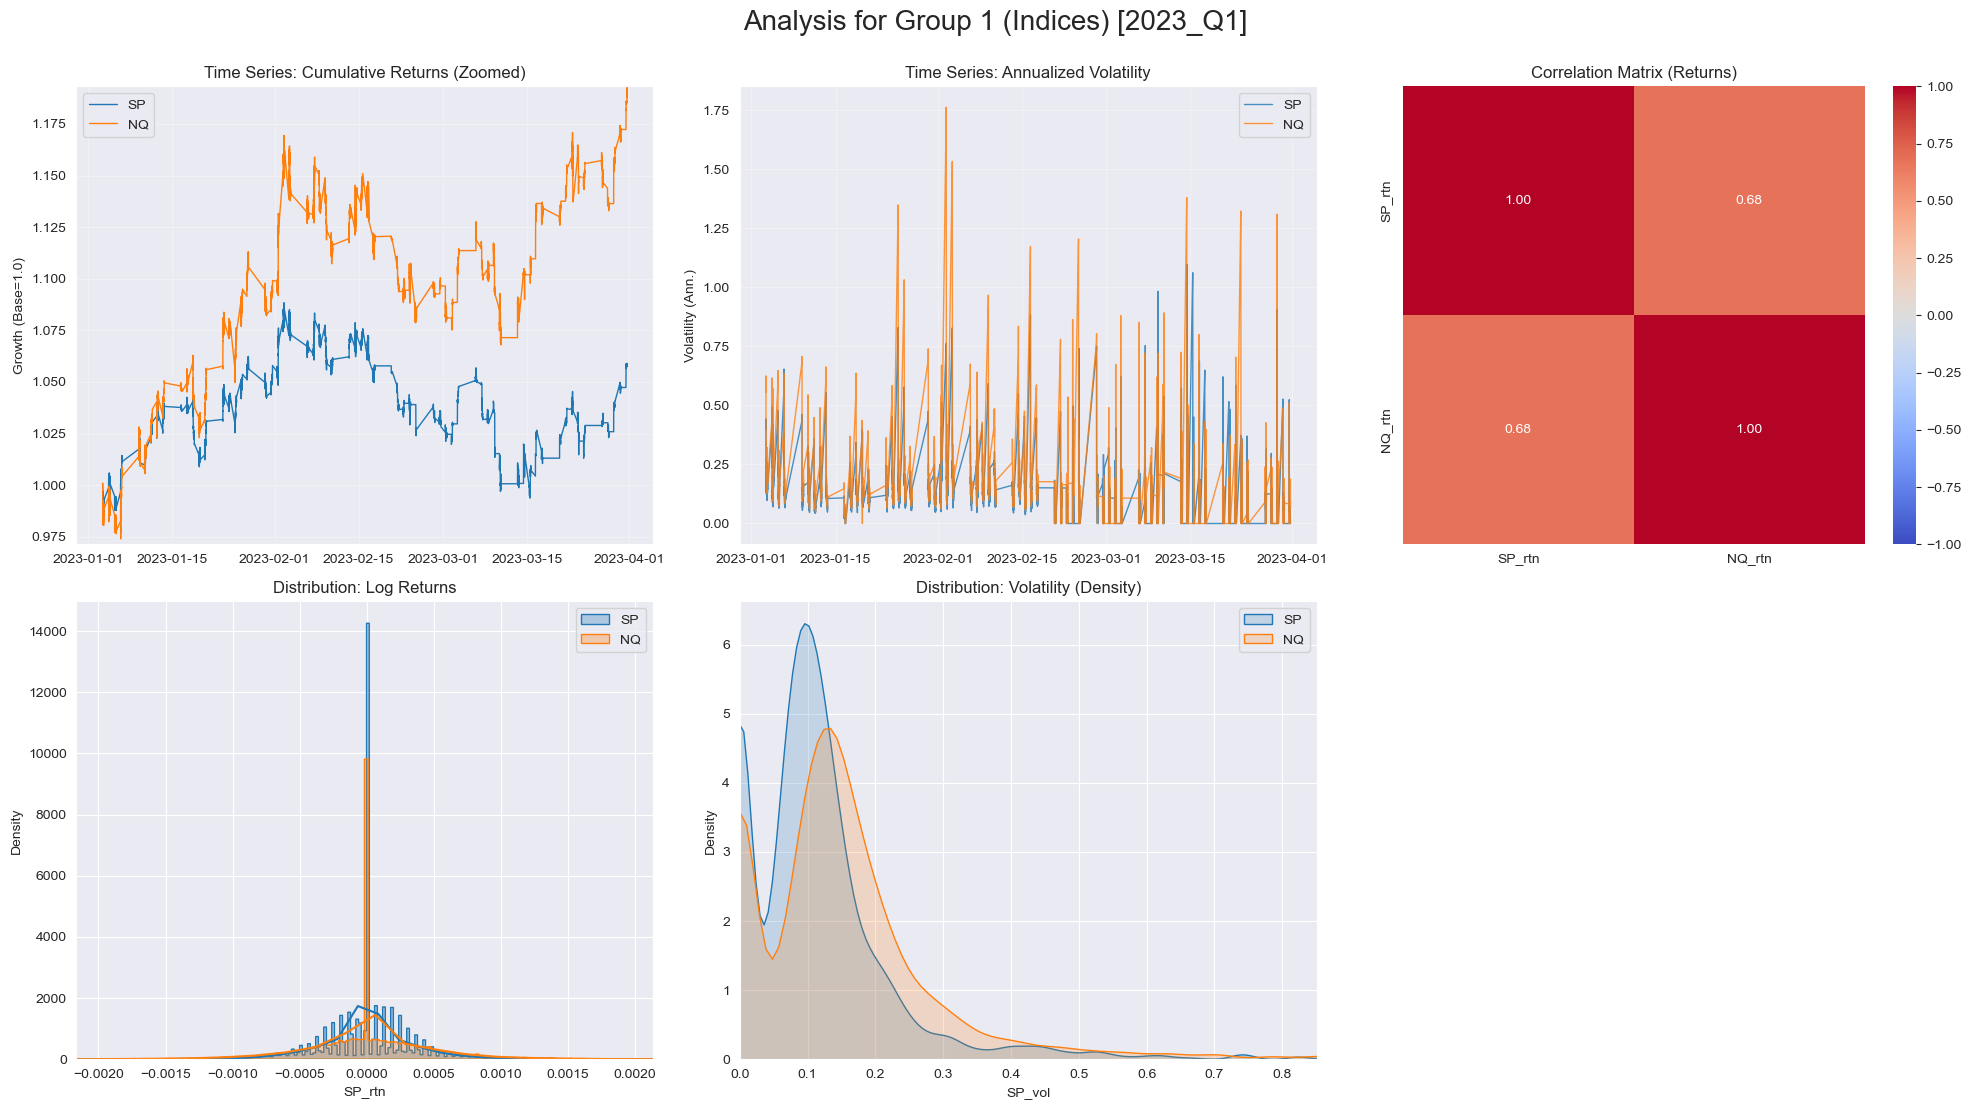

--------------------------------------------------

Processing Group 1 (Indices) - Quarter: 2023_Q3


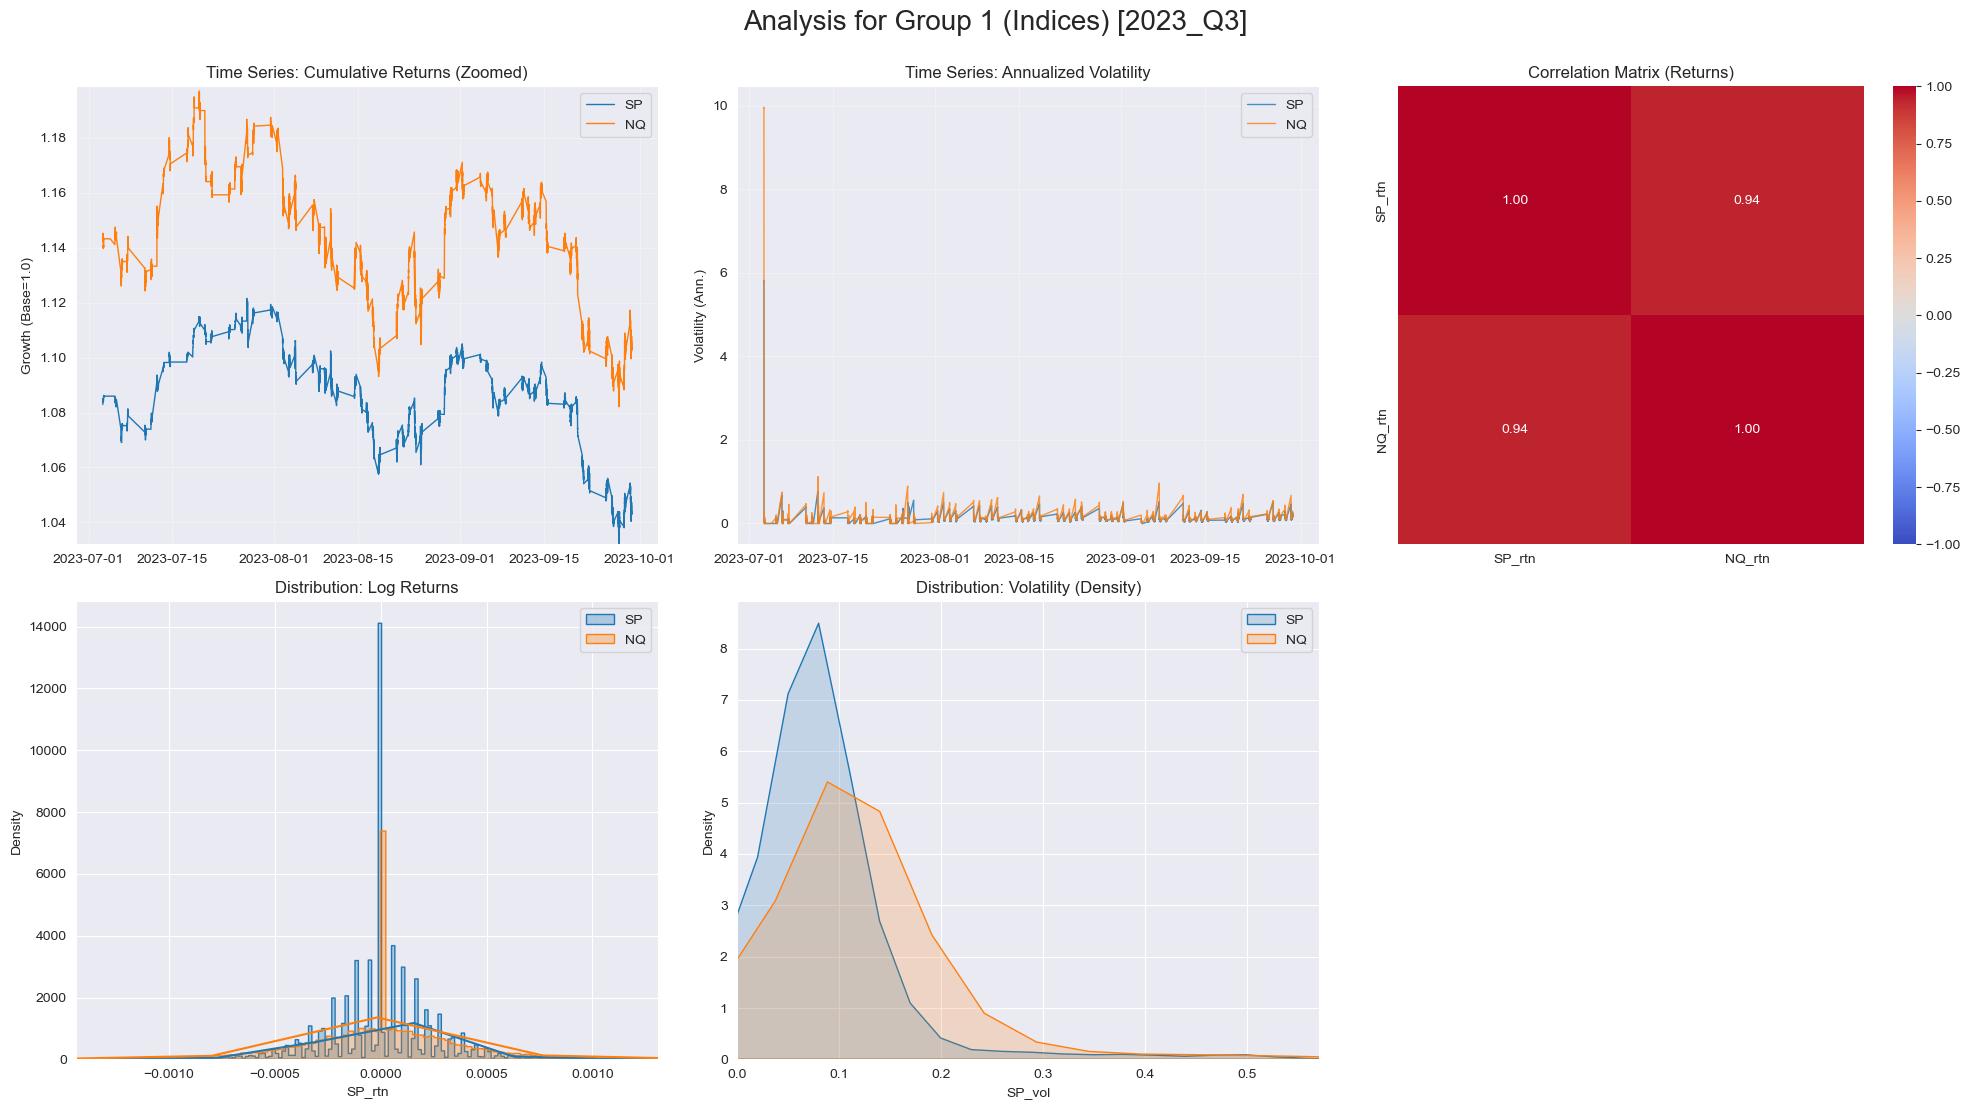

--------------------------------------------------

Processing Group 1 (Indices) - Quarter: 2023_Q4


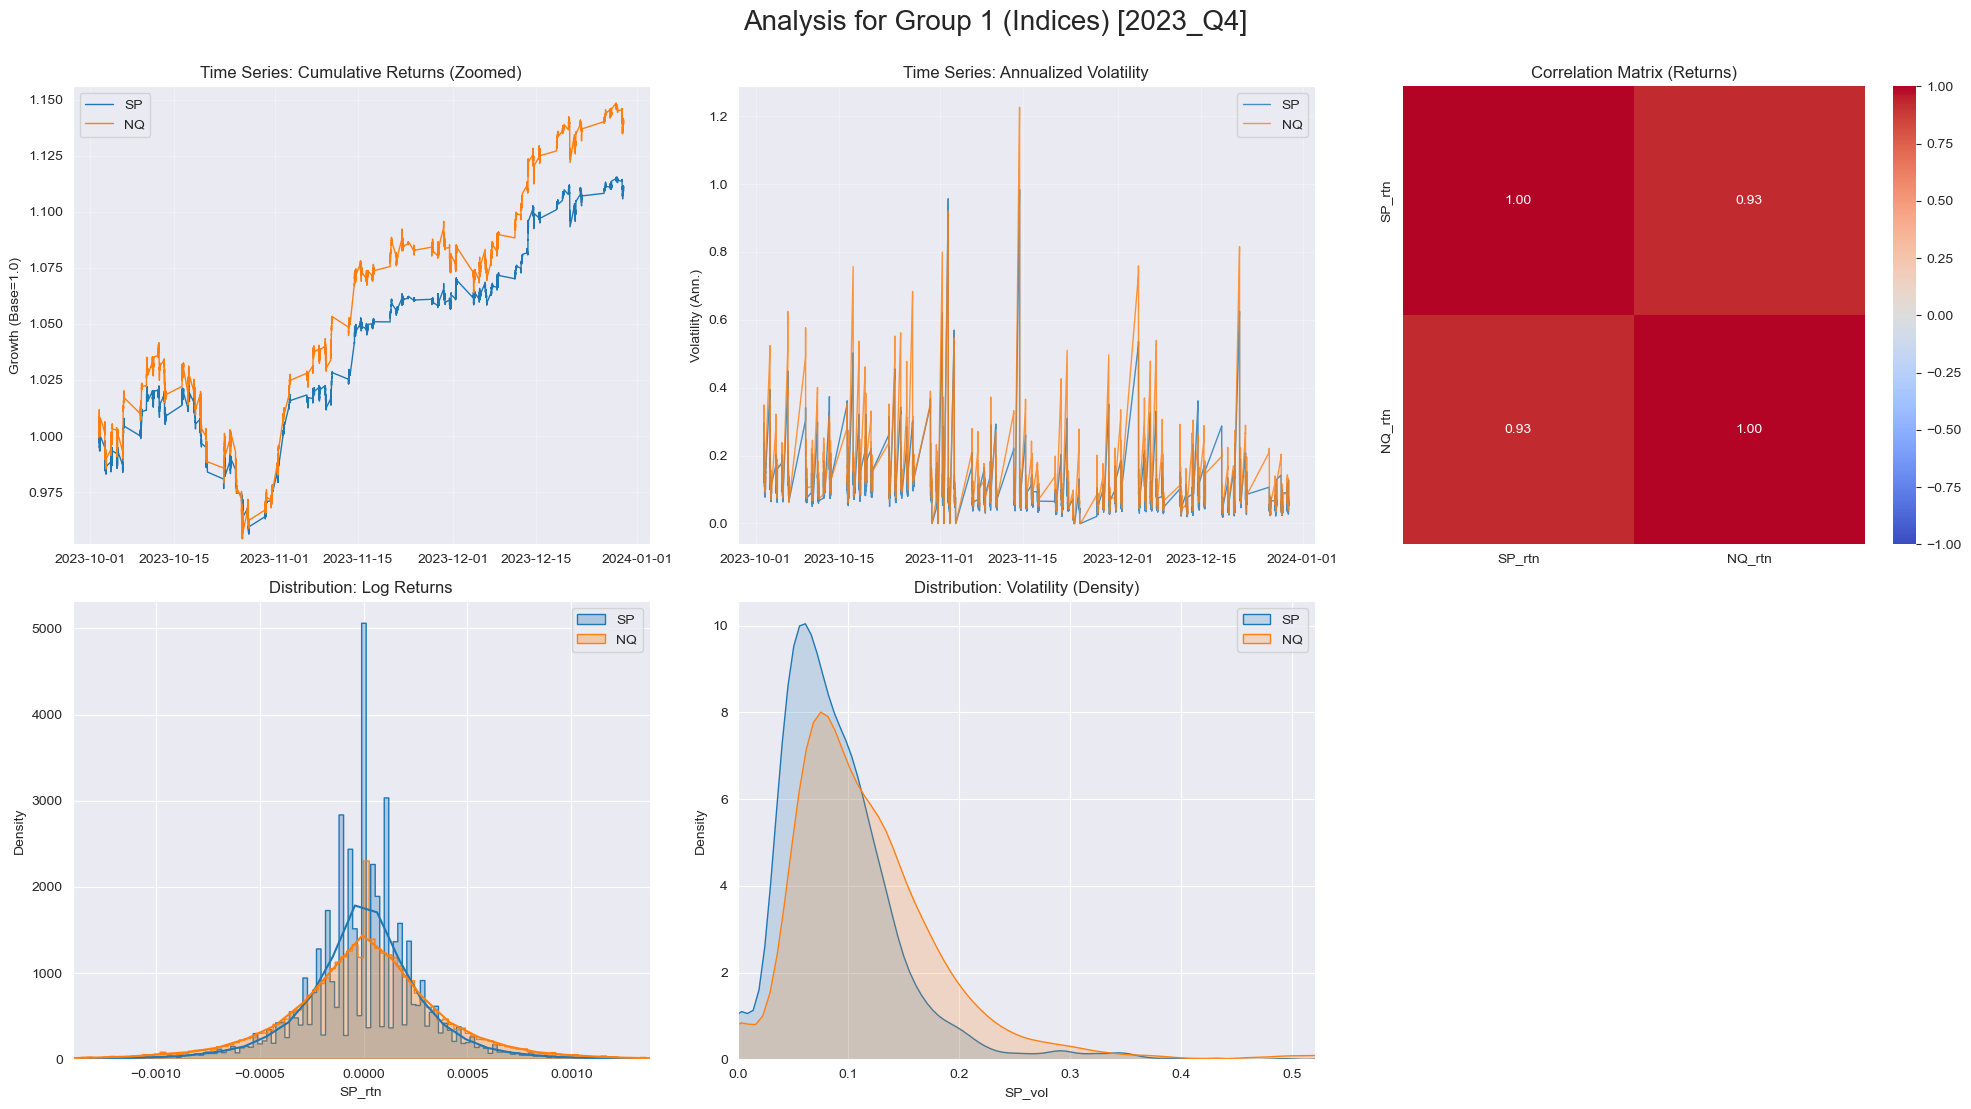

--------------------------------------------------

Processing Group 1 (Indices) - Quarter: 2024_Q2


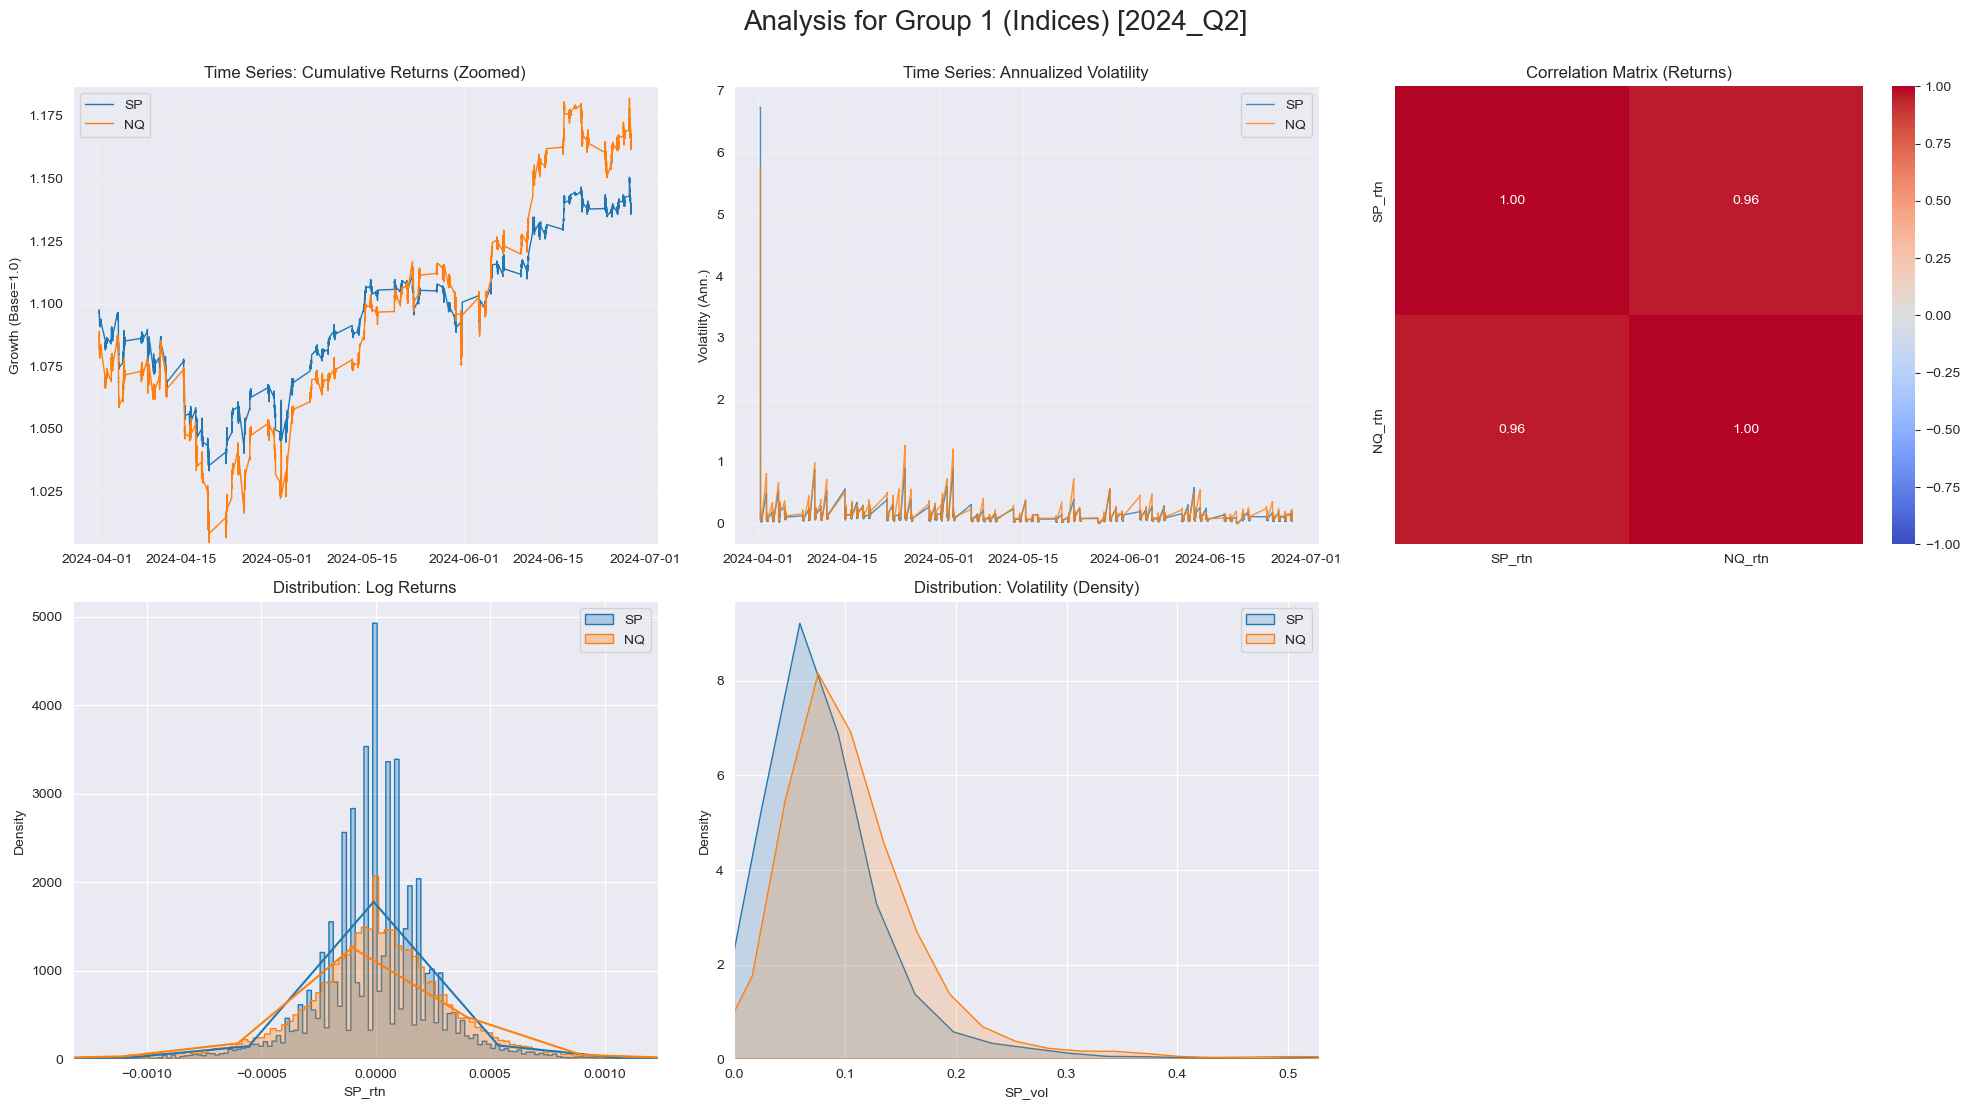

--------------------------------------------------

Processing Group 1 (Indices) - Quarter: 2024_Q4


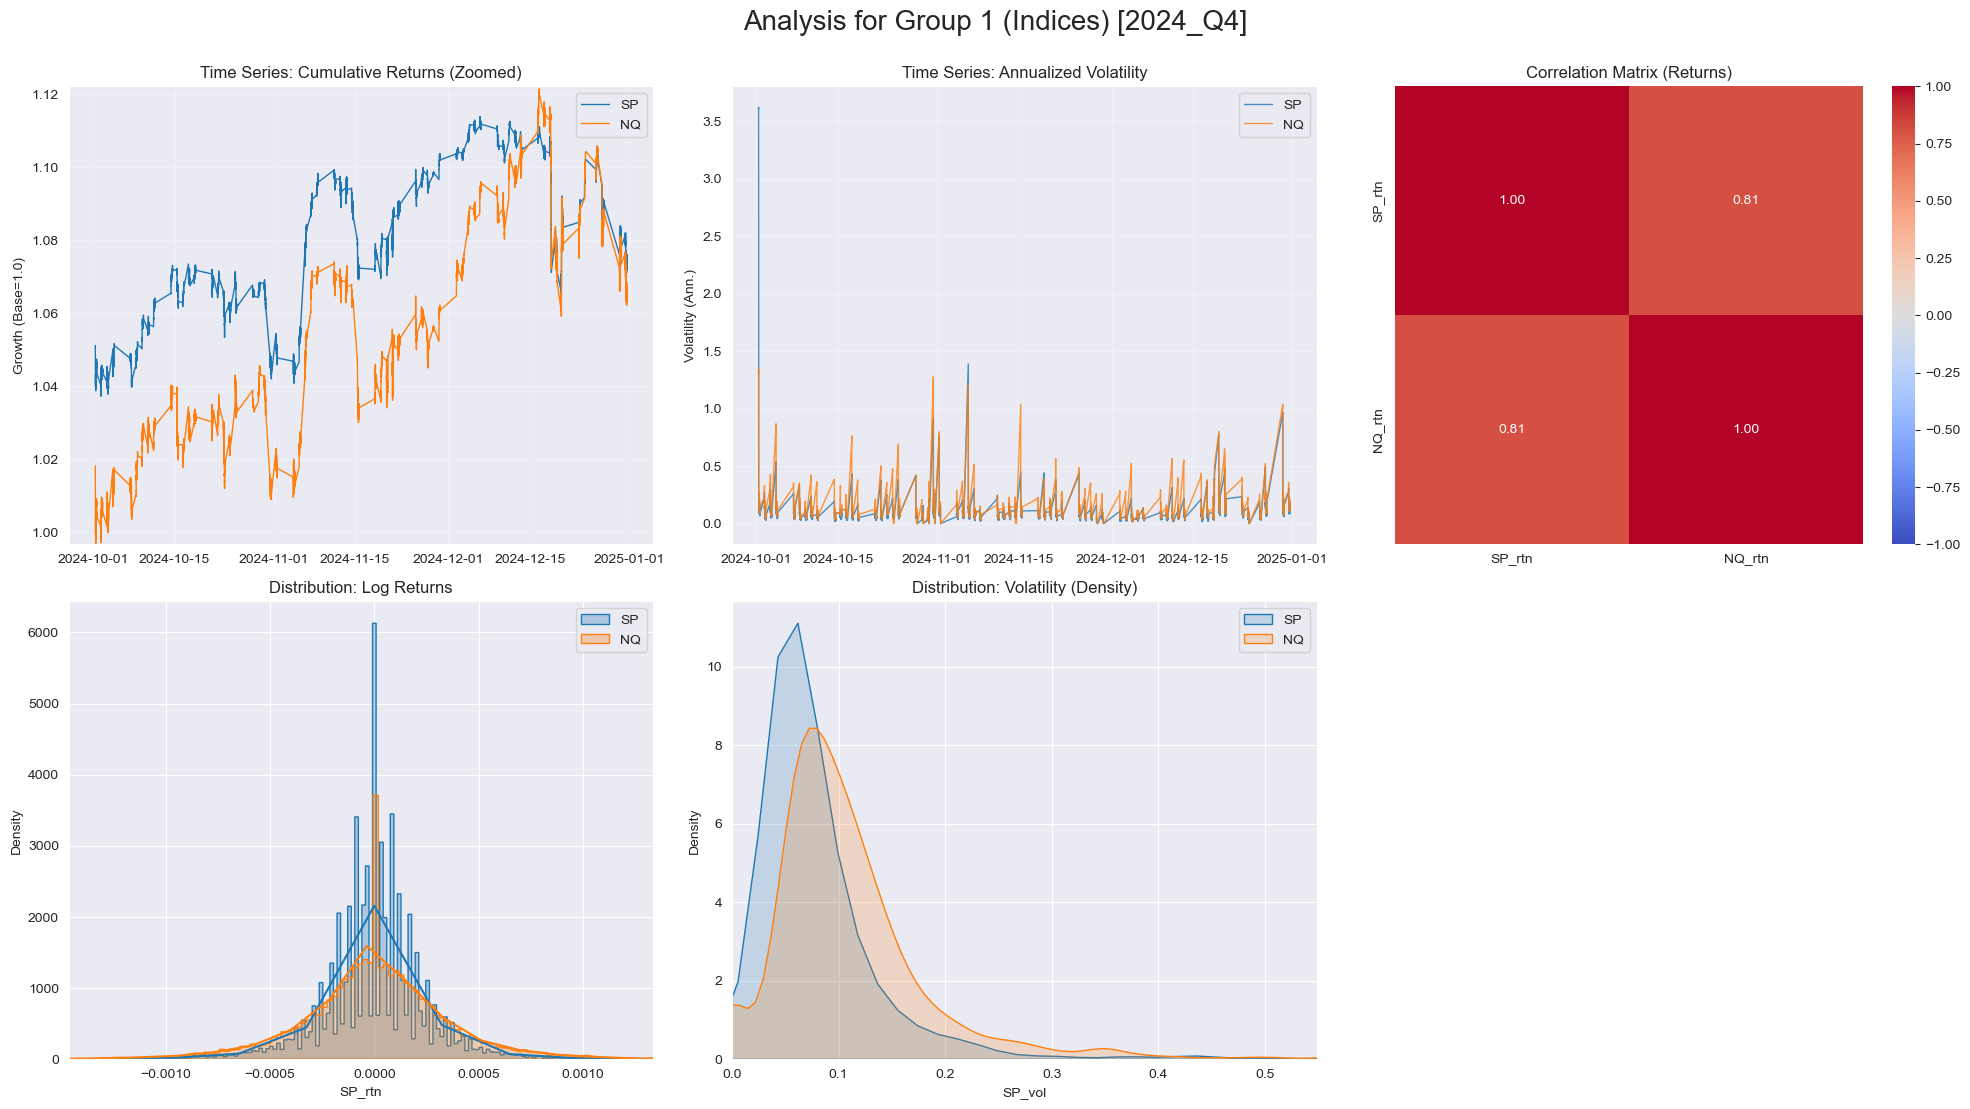

--------------------------------------------------

Processing Group 1 (Indices) - Quarter: 2025_Q1


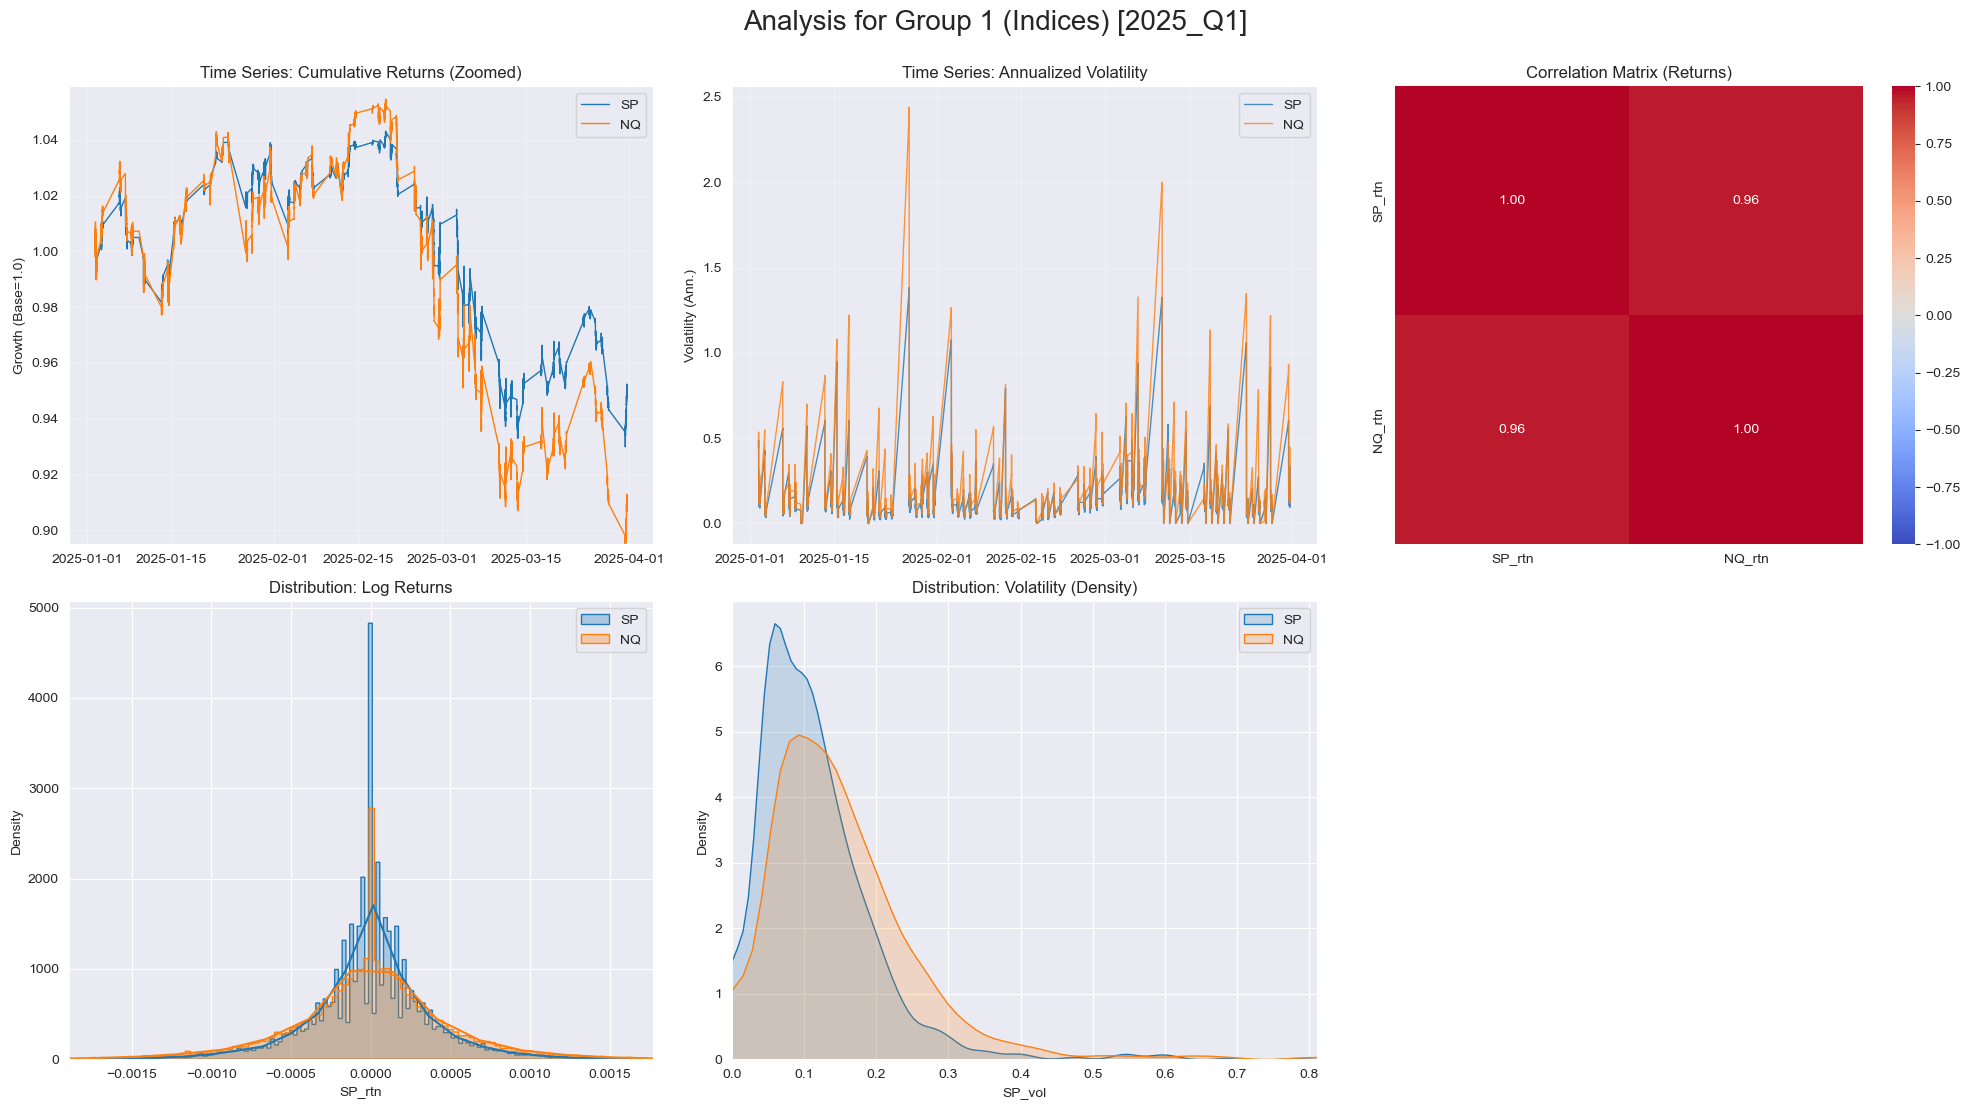

--------------------------------------------------

Processing Group 1 (Indices) - Quarter: 2025_Q2


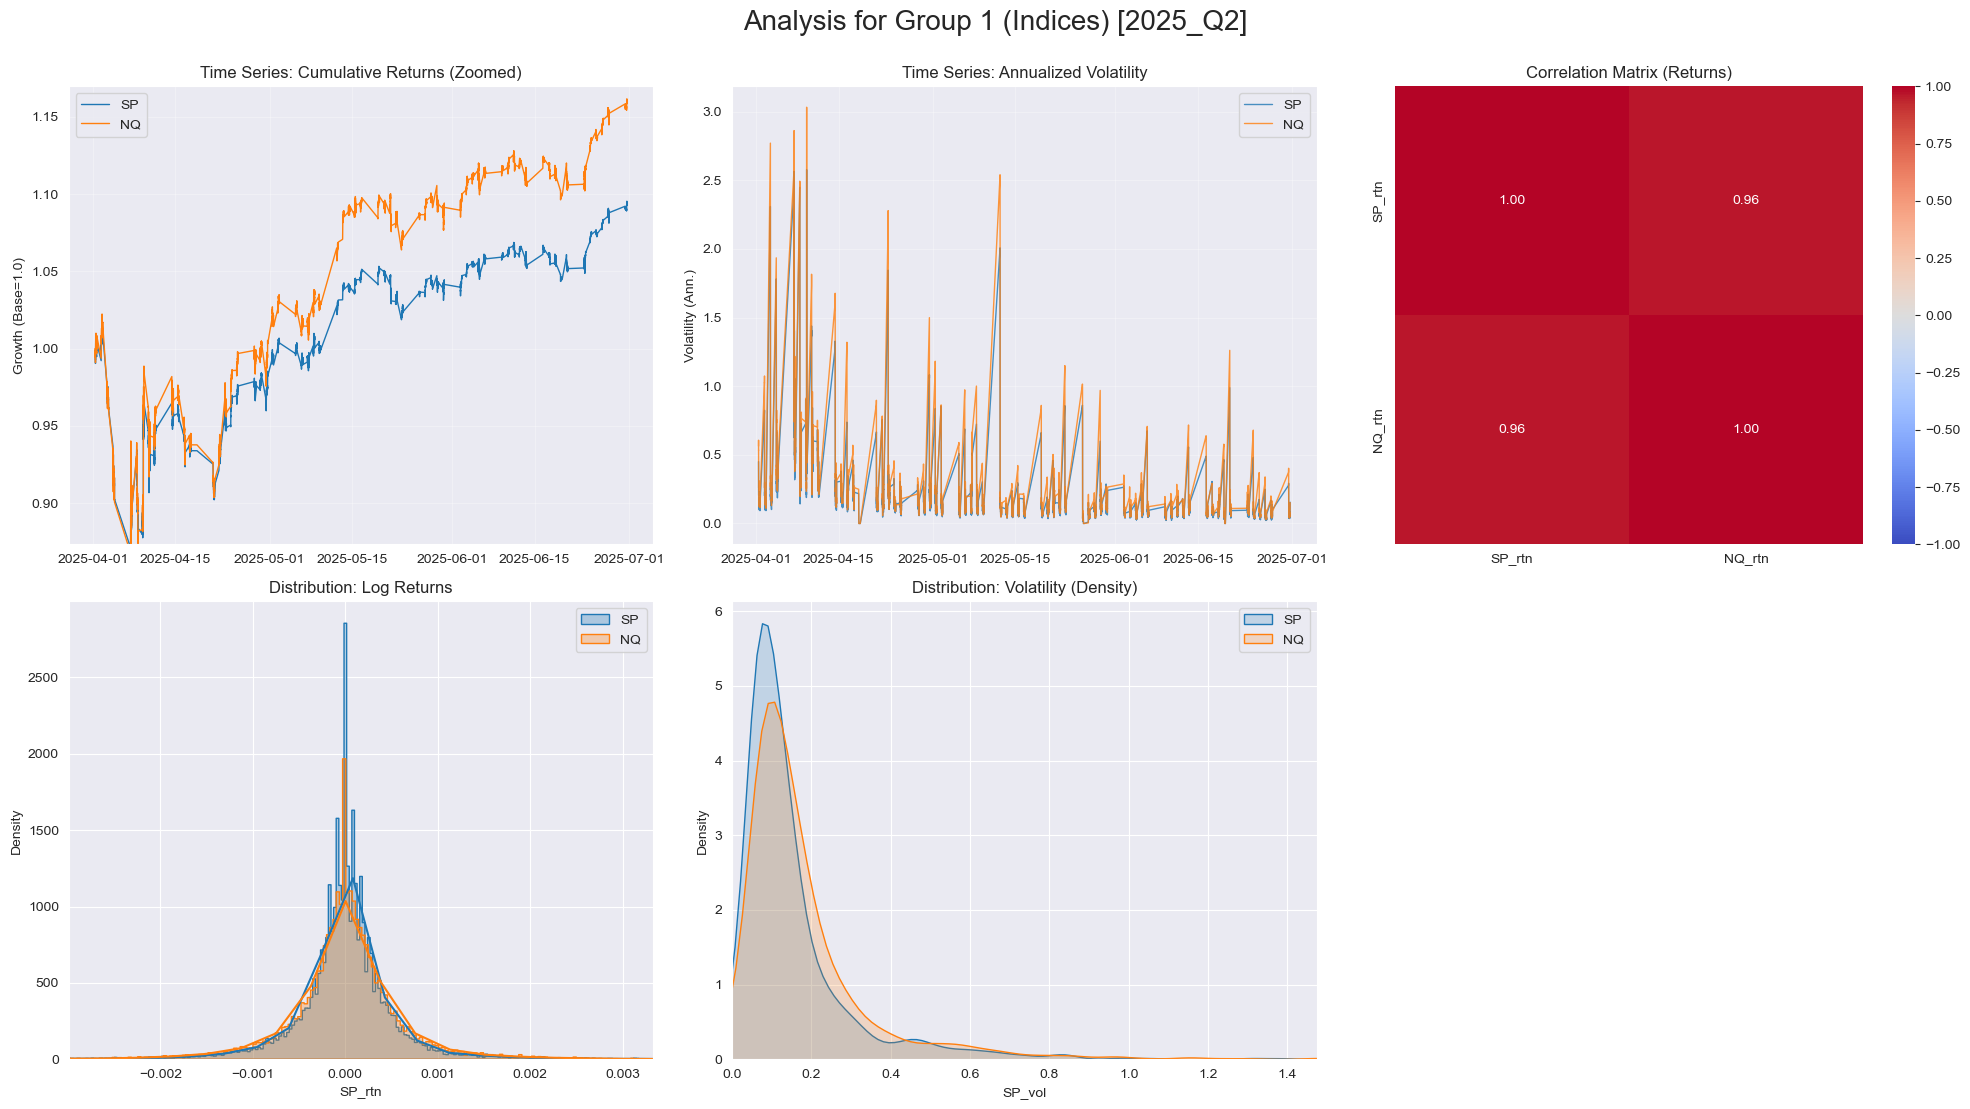

--------------------------------------------------

 STARTING ANALYSIS: GROUP 2 (FX/Commodities)
Found 7 quarters for Group 2 (FX/Commodities): ['2023_Q1', '2023_Q3', '2023_Q4', '2024_Q2', '2024_Q4', '2025_Q1', '2025_Q2']

Processing Group 2 (FX/Commodities) - Quarter: 2023_Q1


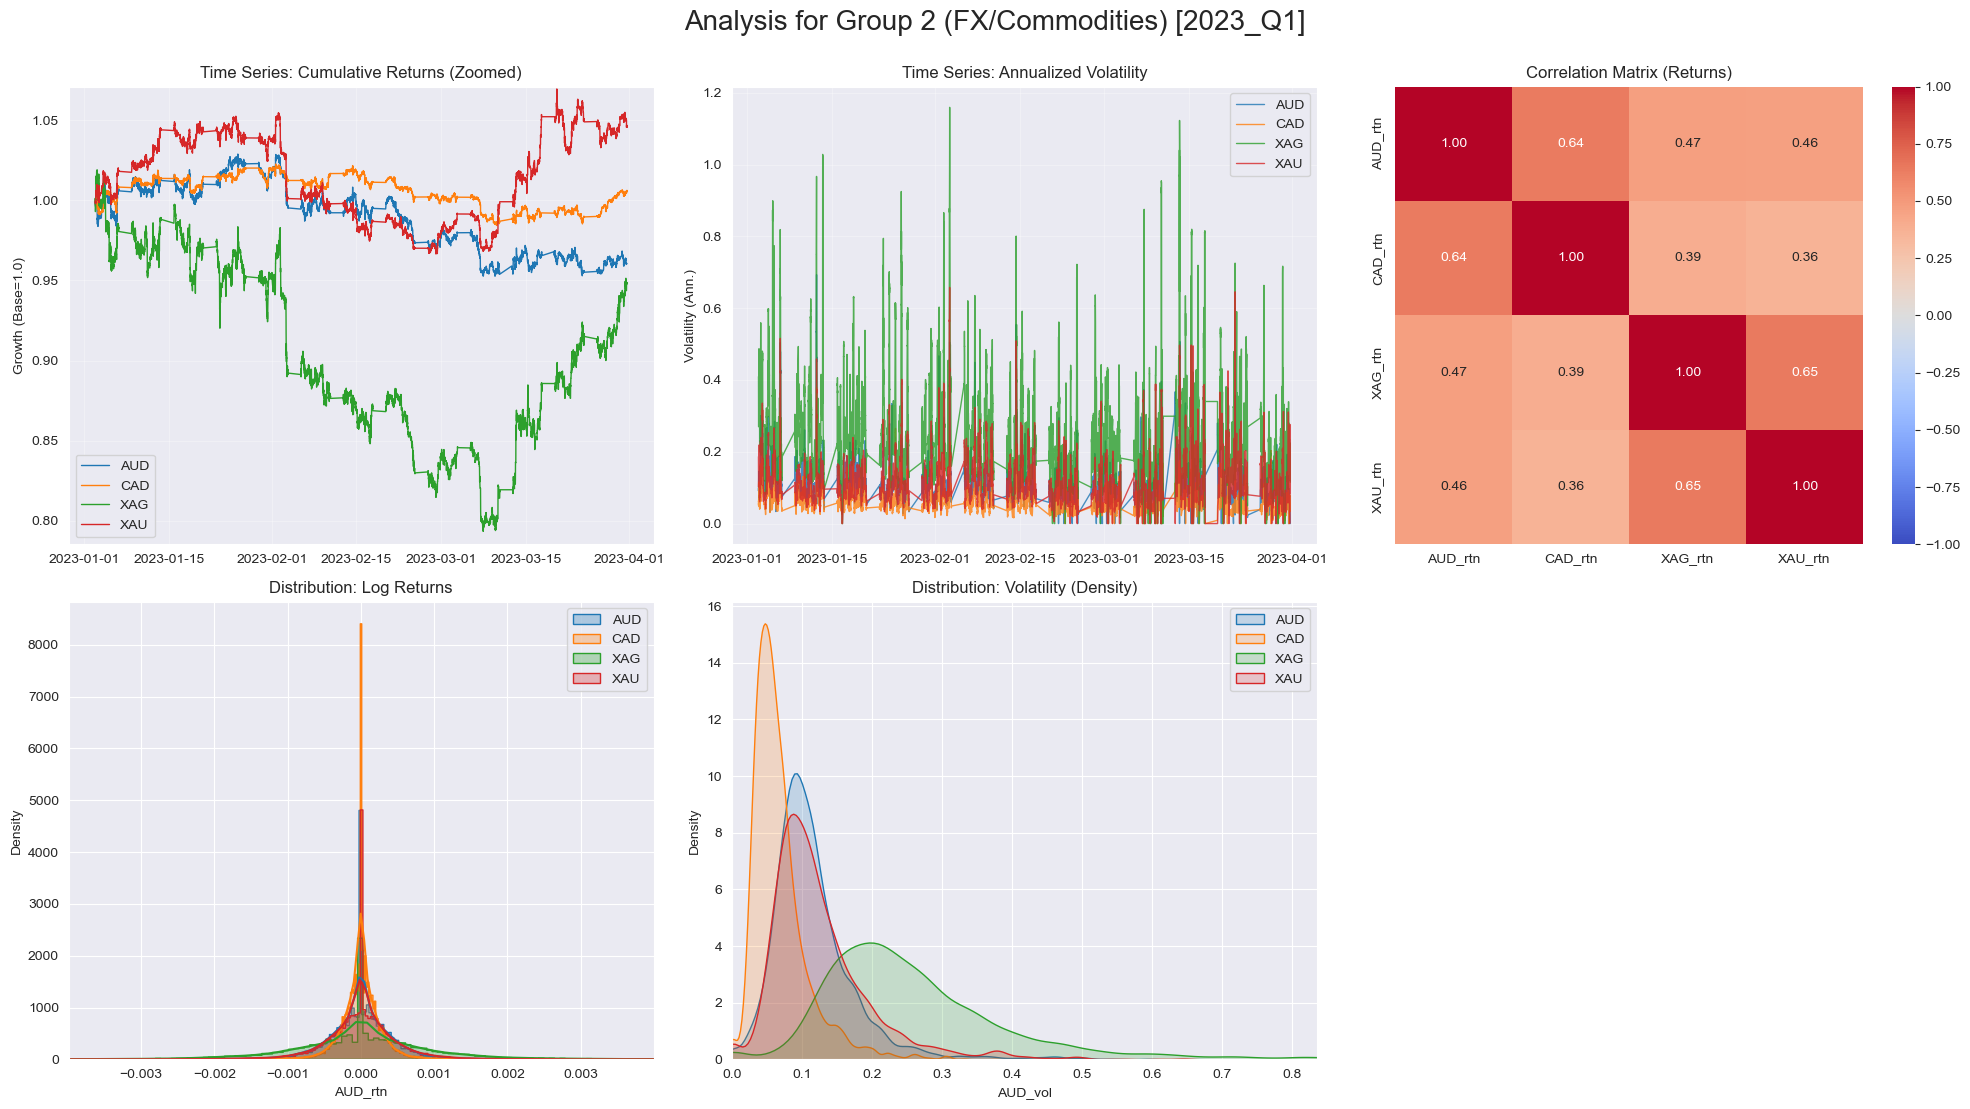

--------------------------------------------------

Processing Group 2 (FX/Commodities) - Quarter: 2023_Q3


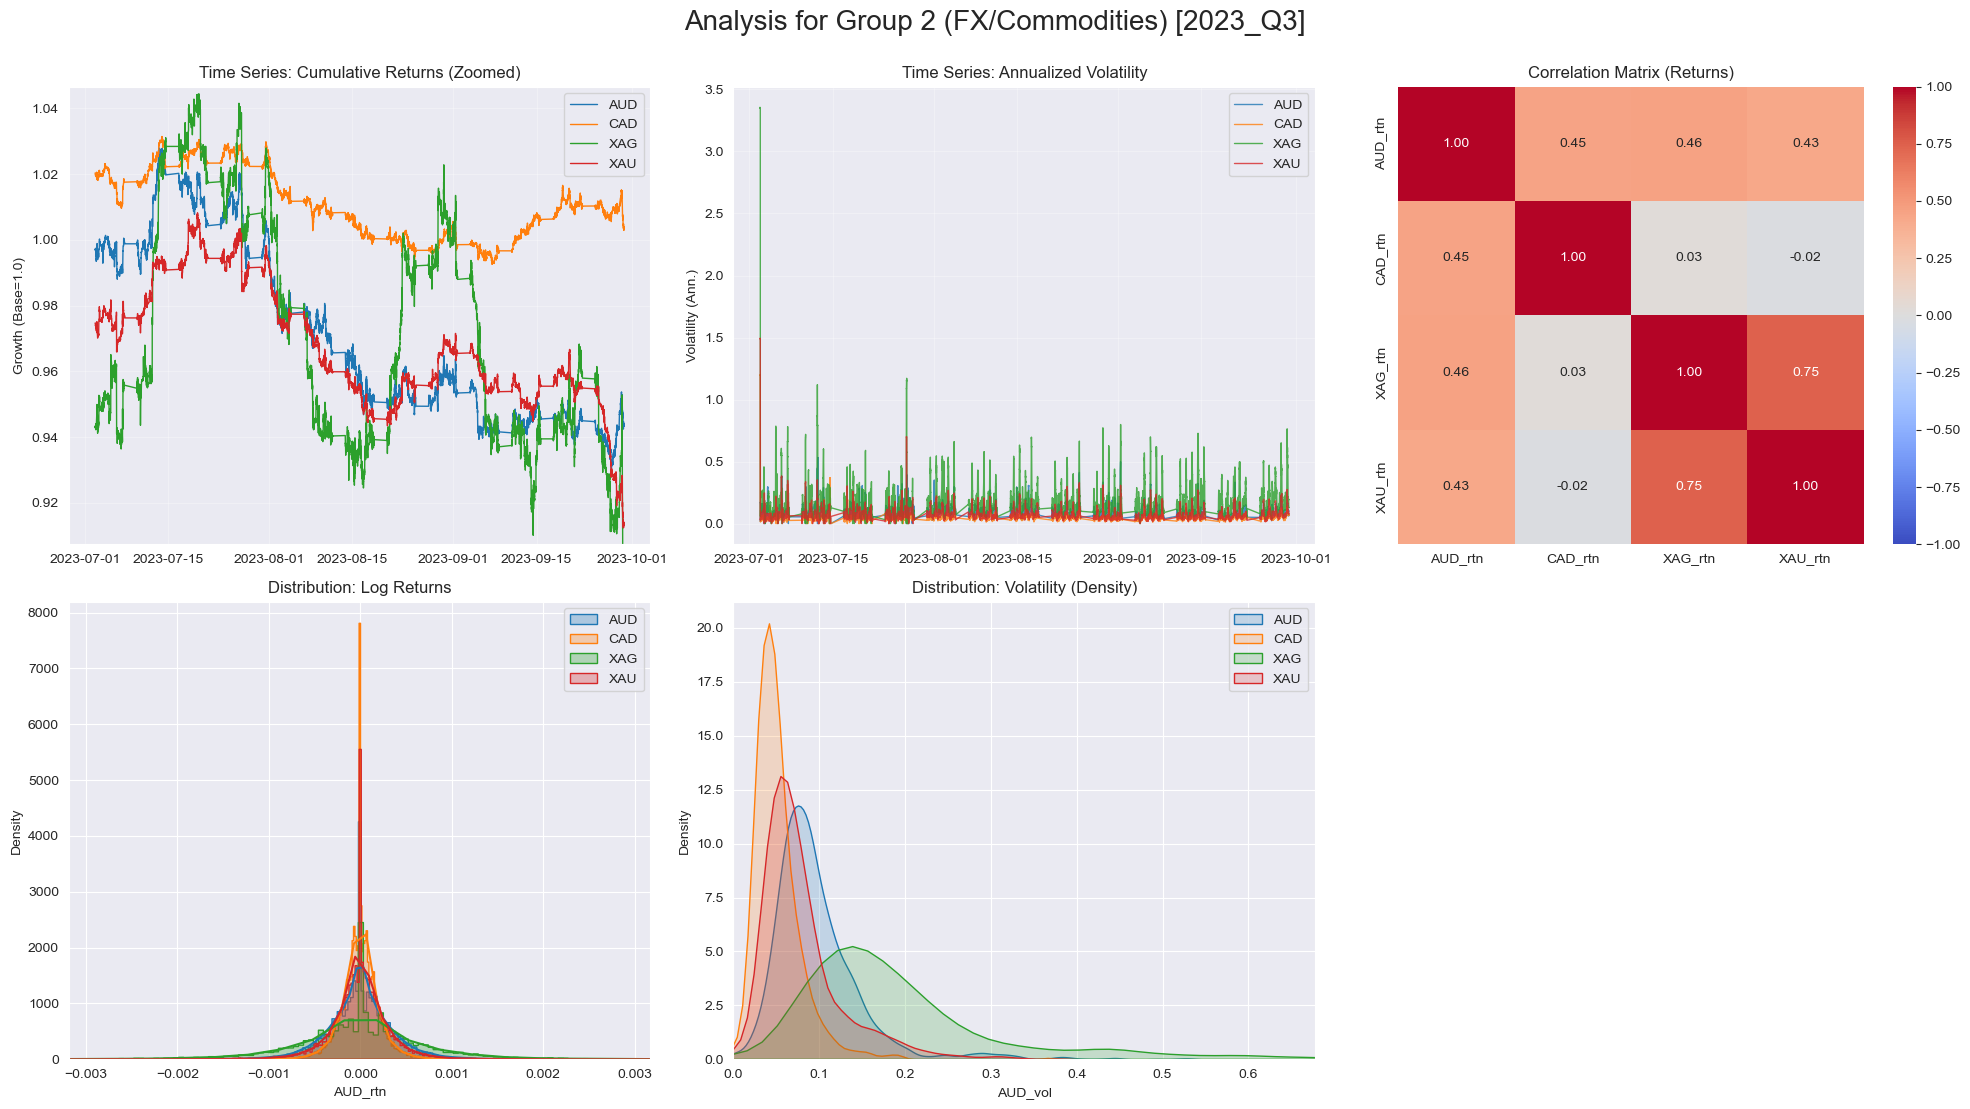

--------------------------------------------------

Processing Group 2 (FX/Commodities) - Quarter: 2023_Q4


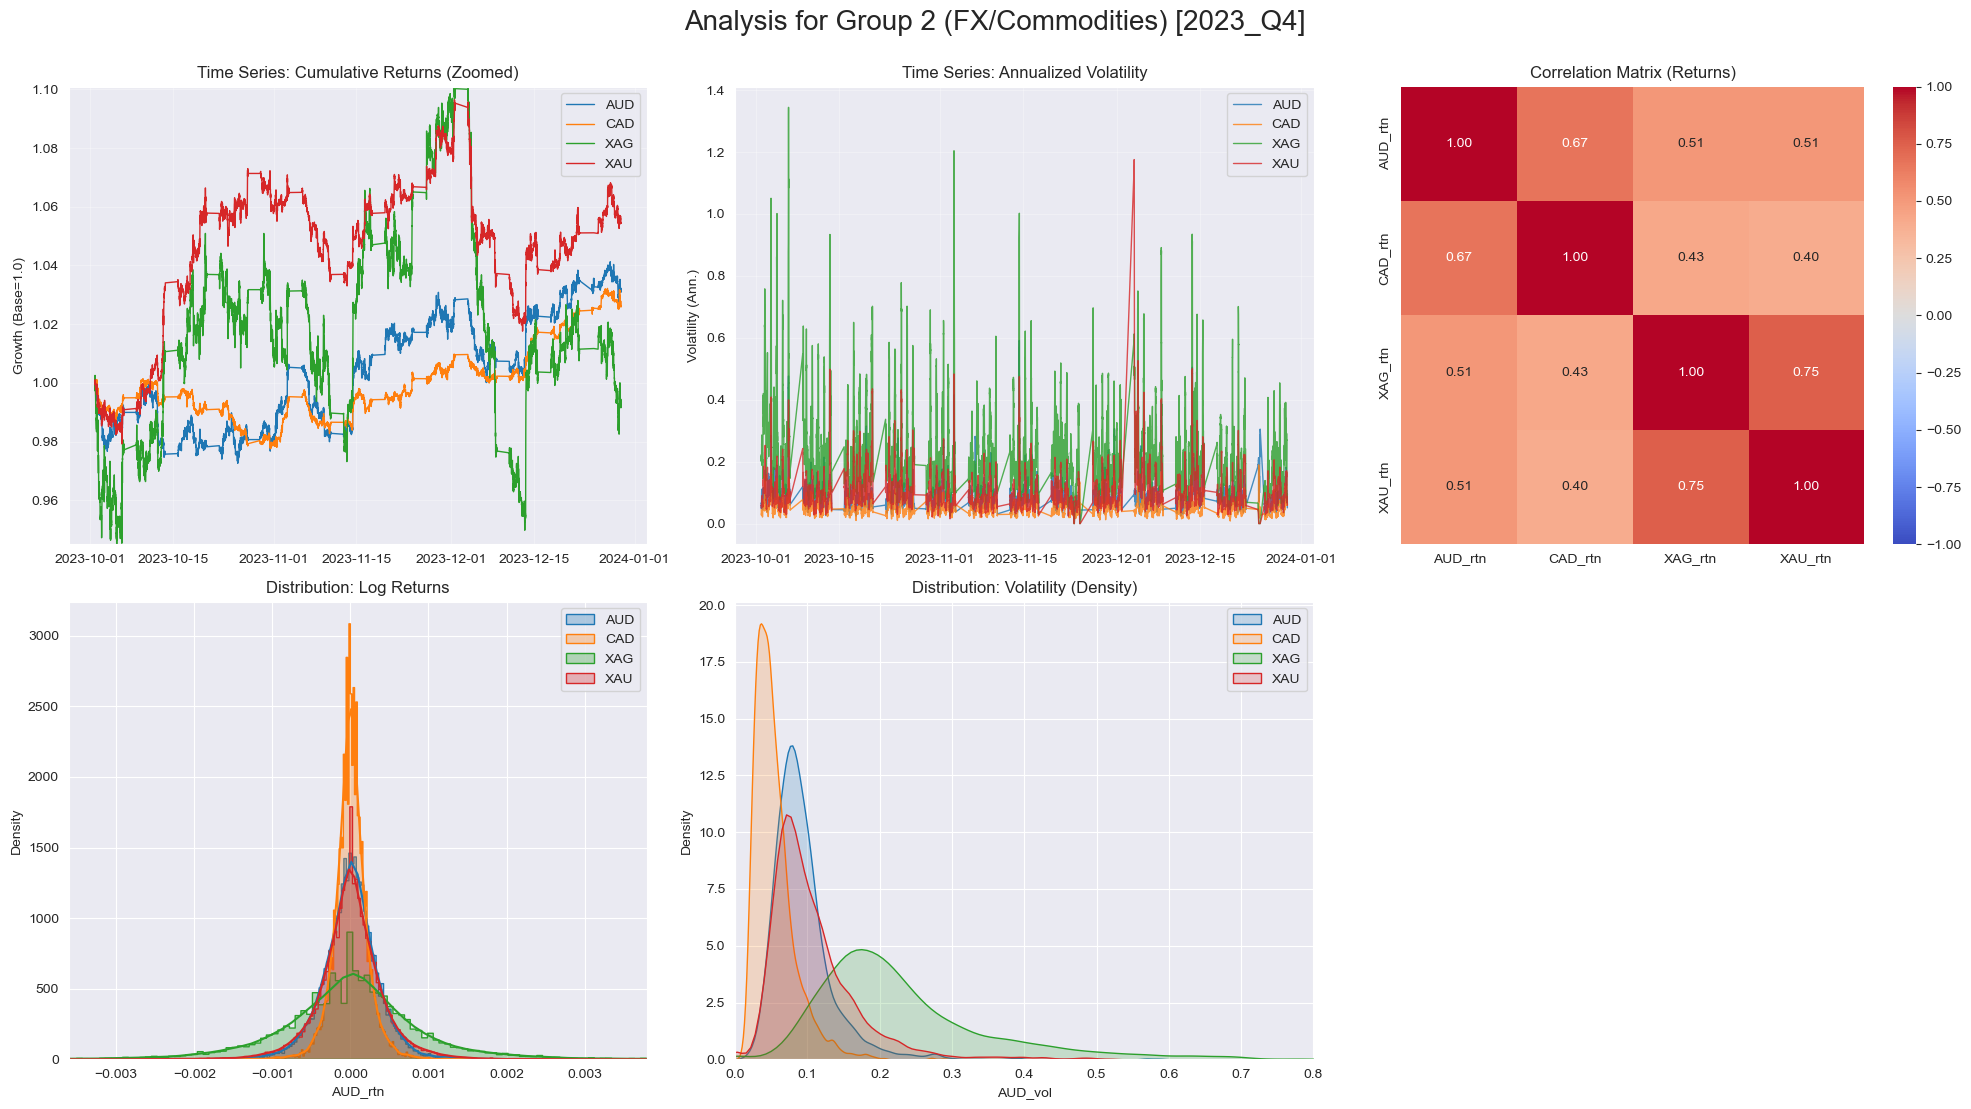

--------------------------------------------------

Processing Group 2 (FX/Commodities) - Quarter: 2024_Q2


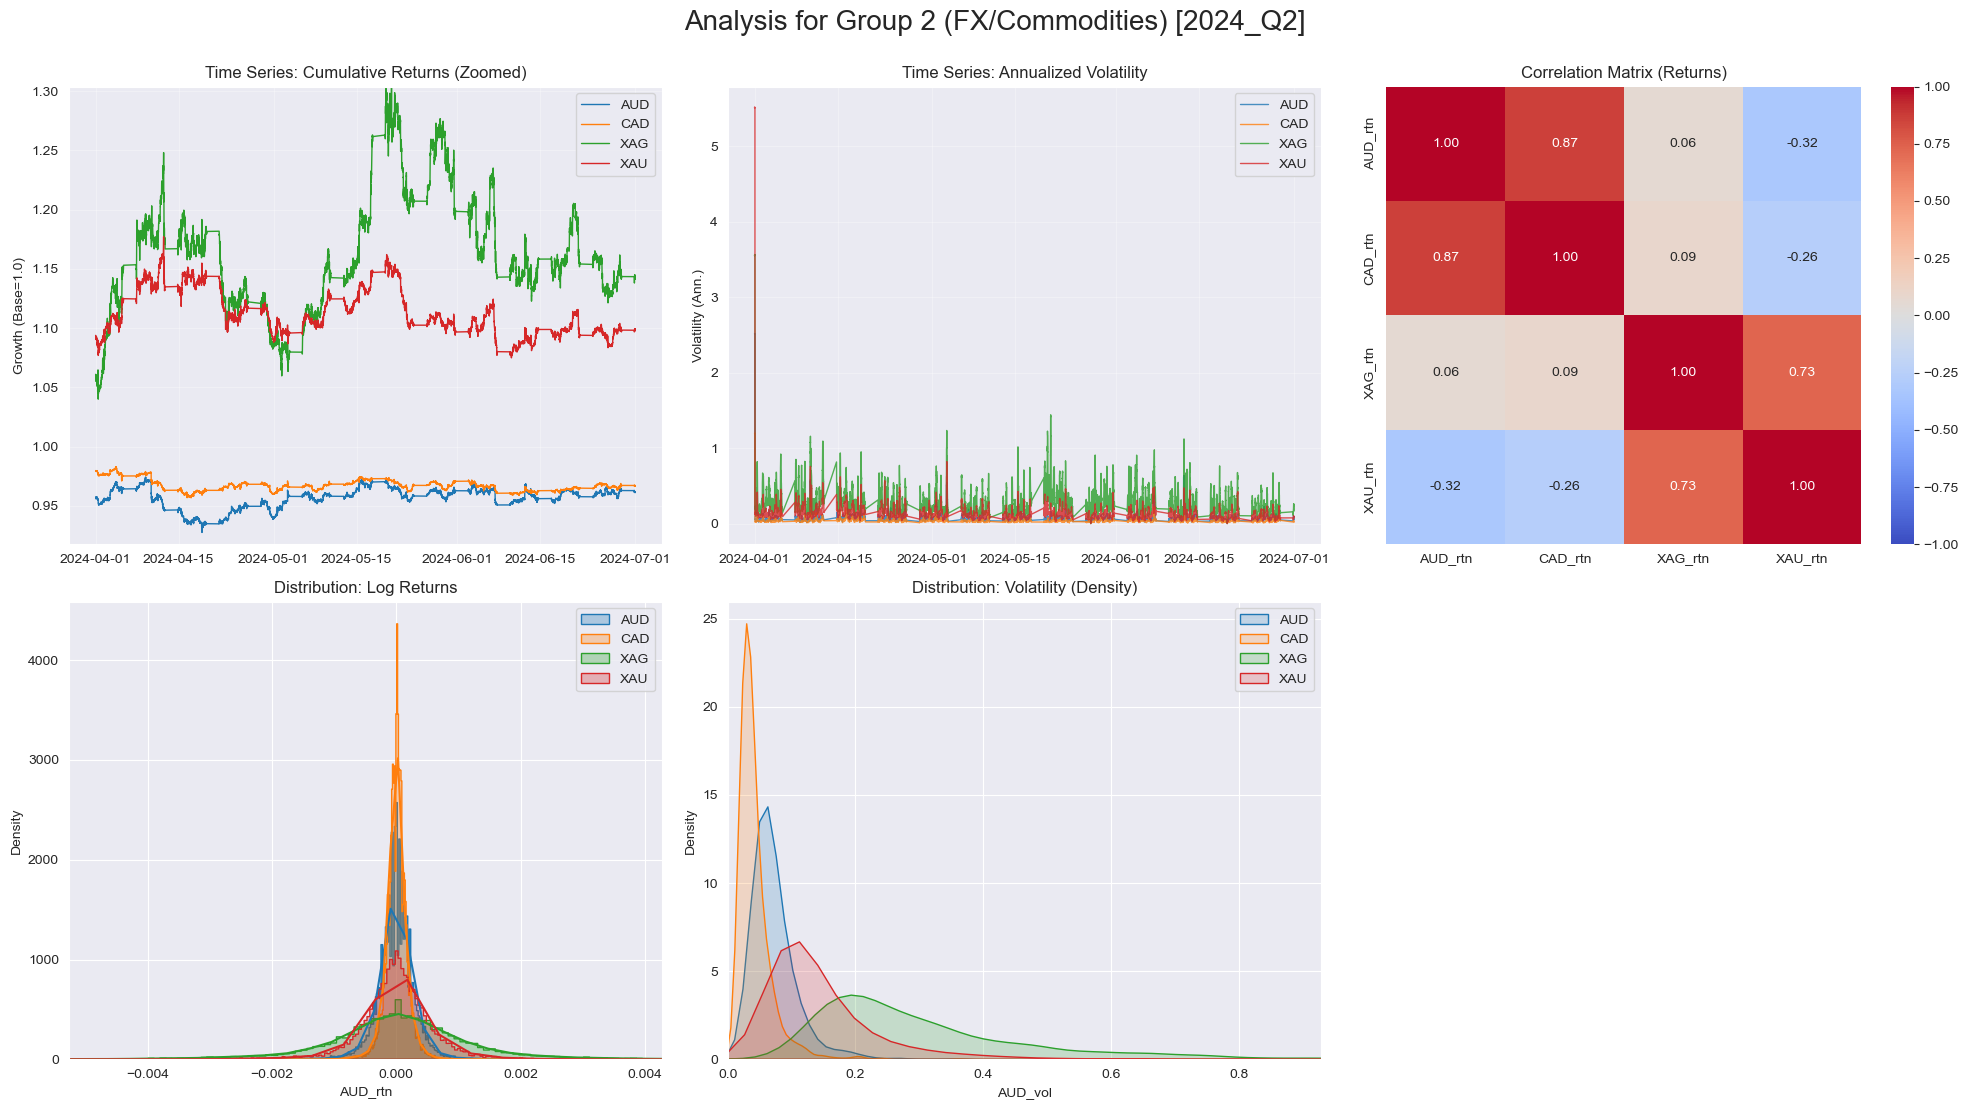

--------------------------------------------------

Processing Group 2 (FX/Commodities) - Quarter: 2024_Q4


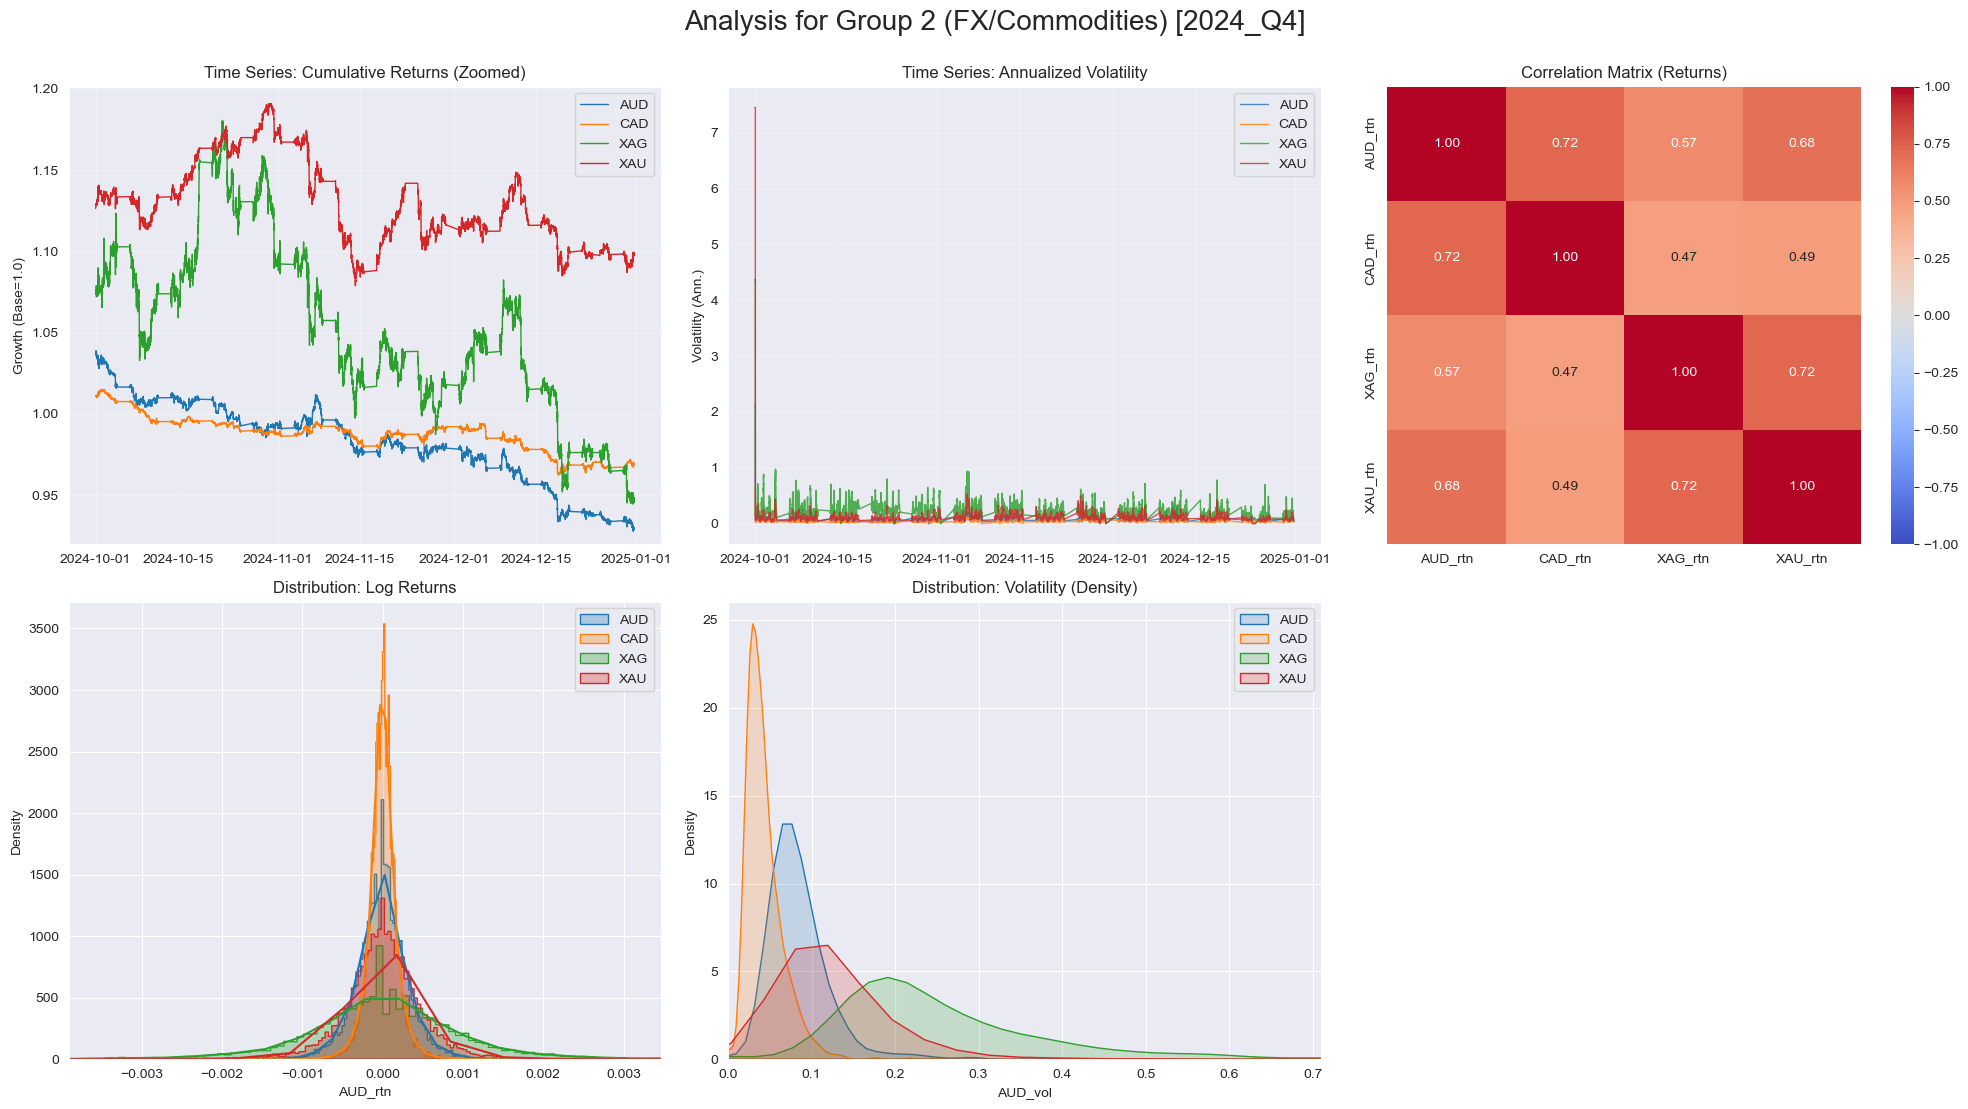

--------------------------------------------------

Processing Group 2 (FX/Commodities) - Quarter: 2025_Q1


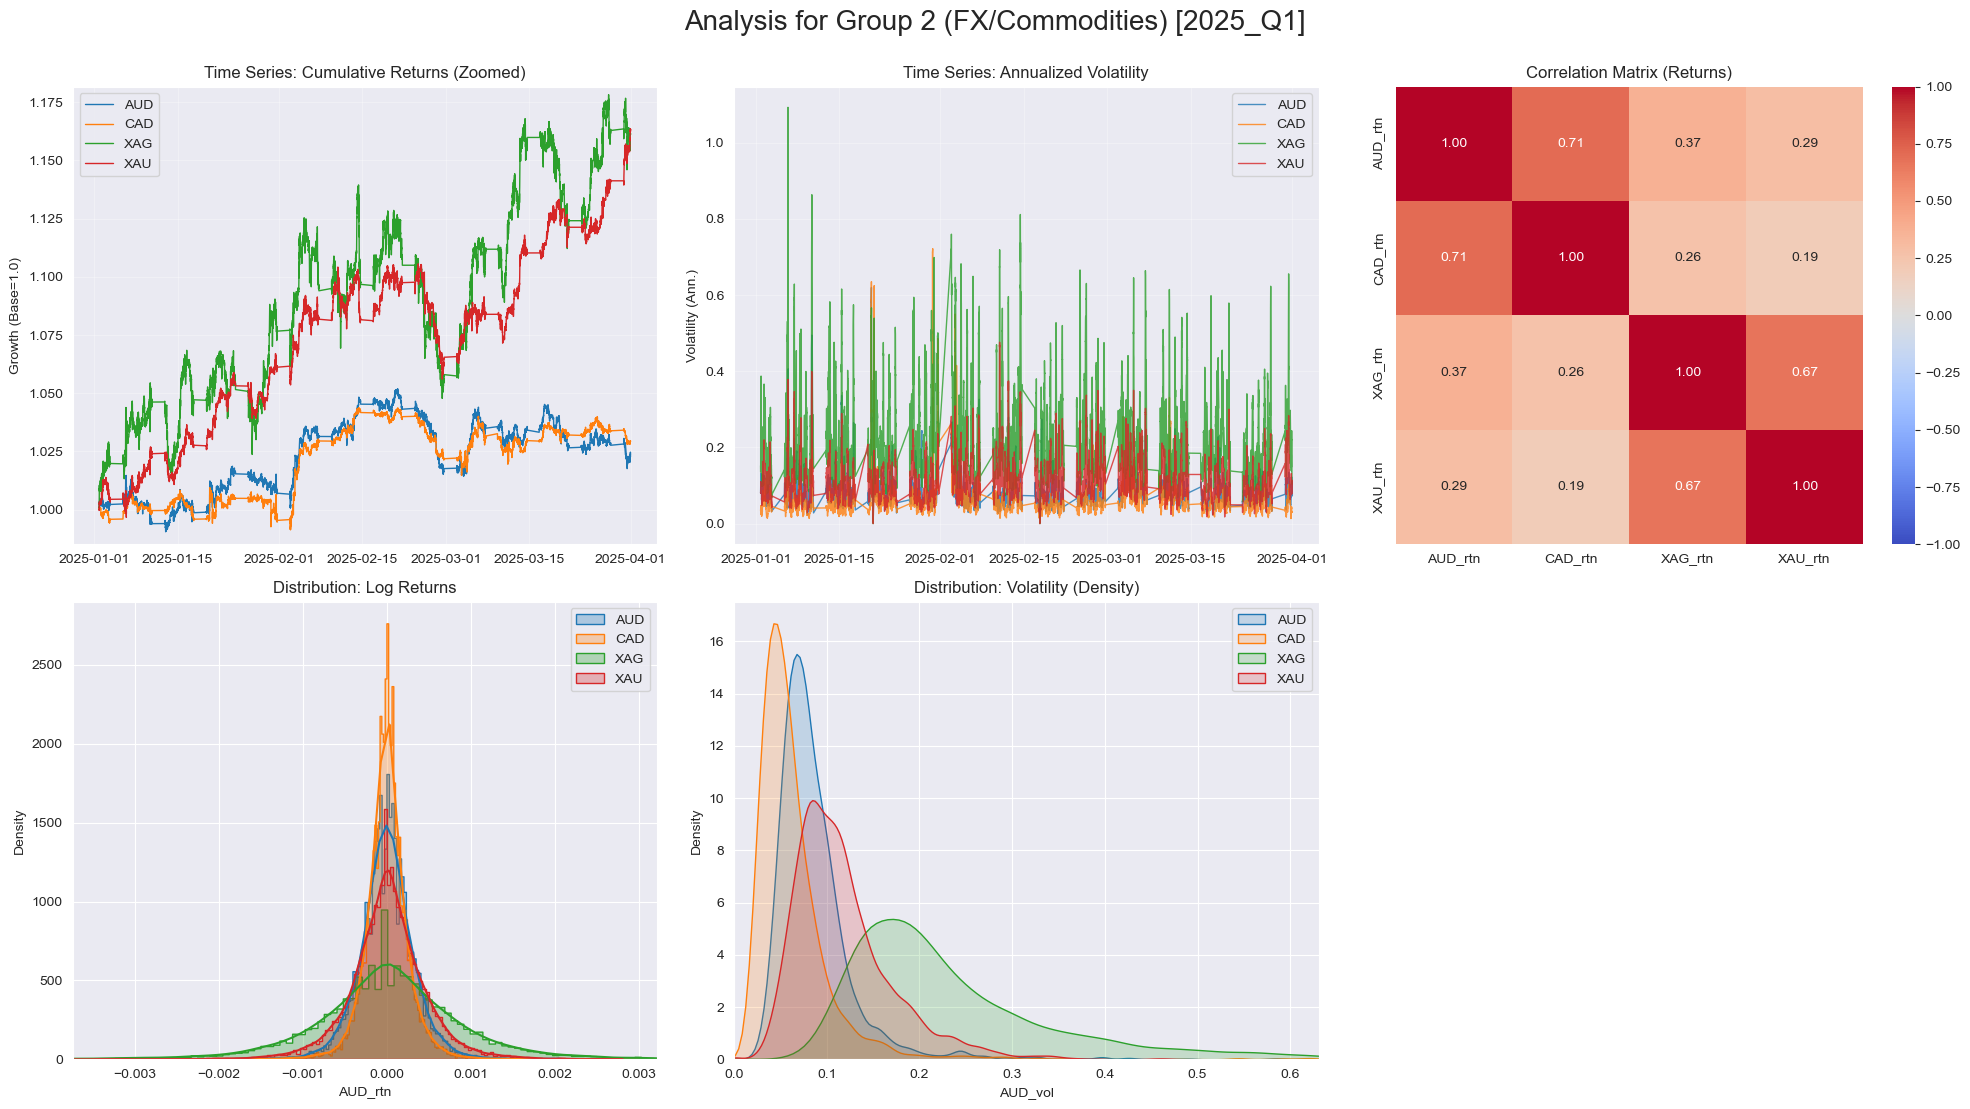

--------------------------------------------------

Processing Group 2 (FX/Commodities) - Quarter: 2025_Q2


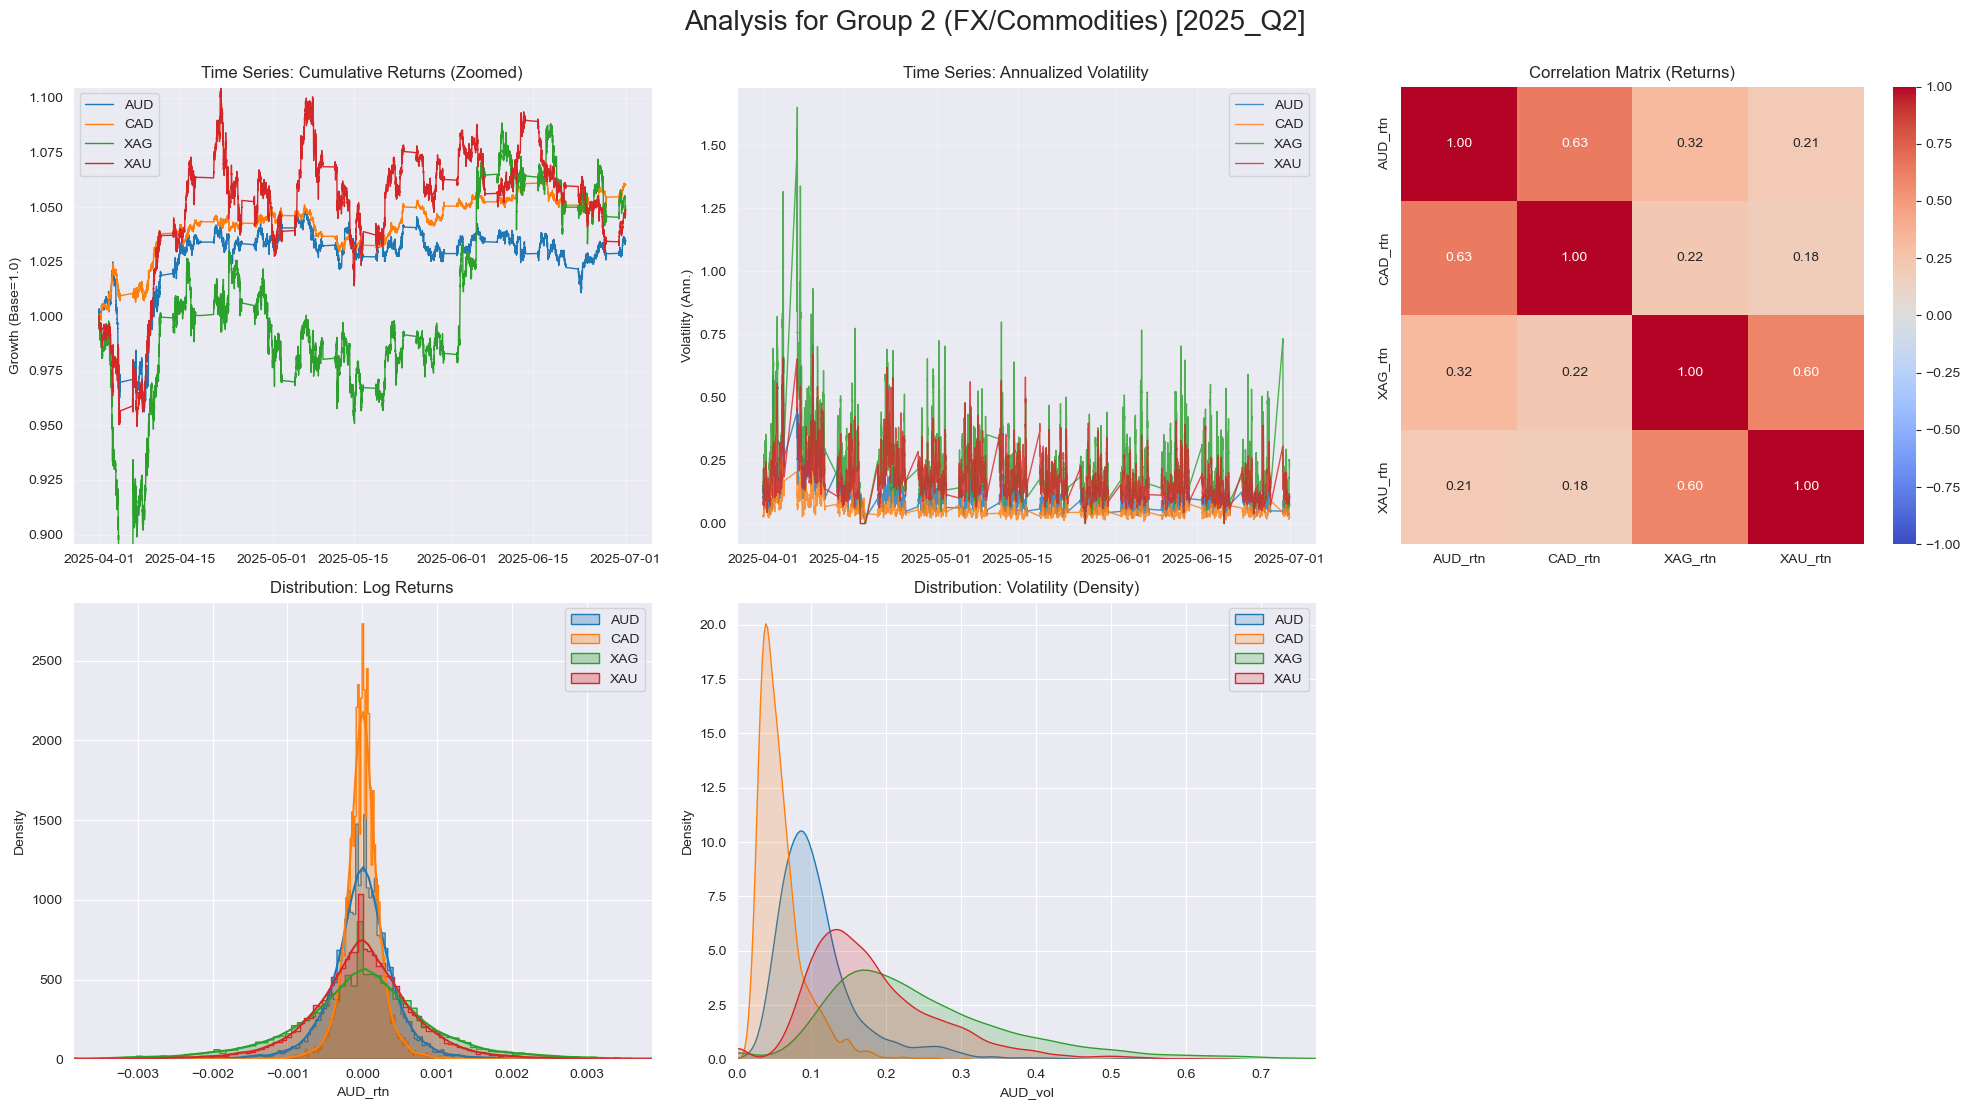

--------------------------------------------------


In [5]:
# ==========================================
# 3. Execution by Quarter
# ==========================================

def run_quarterly_analysis(df, group_label):
    if 'Quarter_ID' not in df.columns:
        print(f"Error: 'Quarter_ID' column not found in {group_label}")
        return

    # Get unique quarters and sort them
    quarters = df['Quarter_ID'].unique()
    quarters = sorted([q for q in quarters if pd.notna(q)])

    print(f"Found {len(quarters)} quarters for {group_label}: {quarters}")

    for q in quarters:
        print(f"\nProcessing {group_label} - Quarter: {q}")

        # Filter data for specific quarter
        df_q = df[df['Quarter_ID'] == q].copy()

        # Run visualization
        plot_asset_group_analysis(df_q, group_label, quarter_id=q)

        print("-" * 50)

# --- Run for Group 1 ---
print("\n" + "="*50)
print(" STARTING ANALYSIS: GROUP 1 (Indices)")
print("="*50)
run_quarterly_analysis(df_g1, "Group 1 (Indices)")

# --- Run for Group 2 ---
print("\n" + "="*50)
print(" STARTING ANALYSIS: GROUP 2 (FX/Commodities)")
print("="*50)
run_quarterly_analysis(df_g2, "Group 2 (FX/Commodities)")

## Exploratory Data Analysis (EDA) Insights

### A. Cumulative Returns \
* **Interpretation:** NQ (Nasdaq / Orange) and SP (S&P 500 / Blue) exhibit an **extremely high positive correlation**. However, it is evident that **NQ has higher volatility and delivers better performance during rising markets** (indicating a high beta).
* **Characteristics:** While the overall trend is upward, there are significant drawdowns during mid-2023 and early 2024.
* **Implication:** A simple "Long Only" strategy works fundamentally, but **robust drawdown management** is required during downturns.

### B. Annualized Volatility
* **Interpretation:** Periodic **massive spikes** are visible in the volatility data.
* **⚠️ Note:** The triangular shape of these spikes appears unnatural.
    > **This is primarily due to an Out-of-Sample period existing within the dataset.** The discontinuity in the data timeline during this period affects the rolling calculation, resulting in these irregular shapes.
* **Characteristics:** Volatility remains low during normal conditions but jumps significantly during specific events (or data discontinuities). NQ consistently maintains a higher base volatility than SP.
* **Implication:** Filtering mechanisms, such as "**halting trading when volatility exceeds a certain level**" or conversely "**targeting volatility breakouts**," would be effective.

### C. Return & Volatility Distributions
* **Interpretation:**
    * **High Kurtosis (Leptokurtic):** Data is highly concentrated around 0 (little to no change), indicating long periods where the market remains stagnant.
    * **Fat Tails:** The tails are wider than a normal distribution, indicating that **extreme price movements (surges or crashes)** occur more frequently than expected by standard models.
* **Implication:** On a 1-minute timeframe, the majority of the data is "noise." Attempting to capture every small movement will result in **profits being eroded by transaction costs**.
*